# Перегрузка специальных методов и операторов

Перегрузка специальных методов позволяет достичь многих аспектов полиморфизма.

## Приведение к строке. `__str__` и `__repr__`

Если попробовать распечатать экземпляр пользовательского класса, то вы получите нечто не очень содержательное. 

In [1]:
from numbers import Number

class Quaternion(Number):
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d

q = Quaternion(1, 2, 3, 4)
print(q)

При попытке распечатать экземпляр класса `Quaternion` мы получили сообщение, из которого никак нельзя узнать значение атрибутов объекта. 

Этот класс в примере реализует тип [кватернионов](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D1%82%D0%B5%D1%80%D0%BD%D0%B8%D0%BE%D0%BD). Кватернион $q$ можно задать четырьмя действительными числами $a$, $b$, $c$ и $d$. Тогда он определяется как сумма

$$
    q = a + b i + c j + d k.
$$

Сделаем так, чтобы функцией `print` на экран выводилось представление кватерниона в такой форме. Для это необходимо объявить специальный метод [\_\_str\_\_](https://docs.python.org/3/reference/datamodel.html#object.__str__), который отвечает за приведение объекта к строке (встроенная функция [str](https://docs.python.org/3/library/stdtypes.html#str) сначала пытается вызвать этот метод).

In [2]:
class Quaternion(Number):
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def __str__(self):
        return f"{self.a} + {self.b}i + {self.c}j + {self.d}k"

q = Quaternion(1, 2, 3, 4)
print(q)

1 + 2i + 3j + 4k


Есть также похожий метод [\_\_repr\_\_](https://docs.python.org/3/reference/datamodel.html#object.__repr__) (и соответствующая встроенная функция [repr](https://docs.python.org/3/library/functions.html#repr)), который тоже должен возвращать строку. Разница между `__str__` и `__repr__` примерное следующая. 

- Метод `__str__` должен возвращать читабельную для человека строку. Такой метод вызывается функцией `print`. 
- Метод `__repr__` должен возвращать строку, из которой можно было бы восстановить объект. Такой метод может быть полезен для отладки.

Для примера реализуем метод `__repr__`, вычисление результата которого воссоздаст исходный объект.

In [4]:
class Quaternion(Number):
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def __str__(self):
        return f"{self.a} + {self.b}i + {self.c}j + {self.d}k"
    
    def __repr__(self):
        return f"Quaternion(a={self.a}, b={self.b}, c={self.c}, d={self.d})"

q = Quaternion(1, 2, 3, 4)
representation = repr(q)
print(representation)

q_copy = eval(representation)
print(q_copy)

Quaternion(a=1, b=2, c=3, d=4)
1 + 2i + 3j + 4k


(call_obj)=
## Вызов объекта. `__call__`

Определив специальный метод `__call__`, можно имитировать функции. 

В качестве примера реализуем класс, который позволит вычислять композицию функций одной переменной. Напомним, что композицией двух функций $f:\mathbb{R} \to \mathbb{R}$ и $g:\mathbb{r} \to \mathbb{R}$ называется функция $h = f \circ g:\mathbb{R} \to \mathbb{R}$, значение которой $h(x) = f(g(x))$ для $\forall x \in \mathbb{R}$. 

Реализация такого класса может выглядеть как-нибудь вот так.

In [1]:
from collections.abc import Callable
import math

class Composition(Callable):
    def __init__(self, f, g):
        self.f = f
        self.g = g

    def __call__(self, x):
        return self.f(self.g(x))

f = abs
g = math.sin
h = Composition(f, g)
print(h(-math.pi / 2.))

1.0


Конструктор класса `Composition` принимает на вход две функции (или вызываемых объекта), запоминает их в атрибуты `f` и `g`. При вызове объекта (пара круглых скобок после имени объекта), вызывается метод `__call__`, который в данном случае возвращает результат вычисления `f(g(x))`.

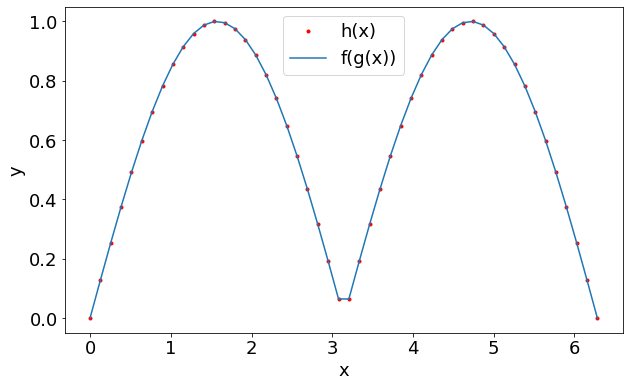

In [3]:
import numpy as np
from matplotlib import pyplot as plt
plt.rc('font', size=18)


X = np.linspace(0, 2*np.pi)
Y1 = [h(x) for x in X]
Y2 = [f(g(x)) for x in X]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, Y1, "r.", label="h(x)")
ax.plot(X, Y2, label="f(g(x))")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

## Итератор по объекту. `__iter__`

Если ваш элемент класс является контейнером, то может потребоваться возможность пробежаться по его элементам. Для этого необходимо, чтобы встроенная функция [iter](https://docs.python.org/3/library/functions.html#iter) возвращала итератор по этому объекту. Чтобы это работало у пользовательского класса, необходимо или реализовать оператор извлечения элемента по индексу (см. [](container_operators)) или реализовать метод `__iter__`, чтобы он возвращал итератор по нему.

[Итератор](https://docs.python.org/3/glossary.html#term-iterator) в свою очередь должен поддерживать метод `__next__` и метод `__iter__`. Последний необходим для того, чтобы итератор сам по себе можно было использовать в цикле `for` (выражение `for x in iterable` первым шагом вызывает `iter(iterable)`) и в схожих контекстах. 

В ряде случаев проще всего реализовать метод `__iter__` в виде генератора, т.к. они автоматически поддерживают и метод `__next__` и метод `__iter__`. В качестве примера рассмотрим класс векторов трехмерного пространства и предположим, что мы хотим уметь итерироваться по его координатам. 

In [126]:
from collections import abc

class Vector3D(abc.Iterable):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def __iter__(self):
        yield self.x
        yield self.y
        yield self.z

v = Vector3D(42, 3, 13)

for coordinate in v:
    print(coordinate, end=" ")

42 3 13 

Как видим, метод `__iter__` является функцией-генератором. Объект генератора результата вызова `__init__()` по очереди возвращает координаты `x`, `y` и `z`.

Теперь, в качестве альтернативы реализуем класс итератора `Iterator` по объектам `Vector3D` в явном виде. Теперь метод `Vector3D.__iter__` возвращает экземпляр класса `Iterator`.

In [5]:
from collections import abc 

class Vector3D(abc.Iterable):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def __iter__(self):
        return Vector3D.Iterator(self)

    class Iterator(abc.Iterator):
        attributes = "xyz"
        def __init__(self, vector):
            print("Создан итератор.")
            self.vector = vector
            self.current = 0

        def __iter__(self):
            return self
        
        def __next__(self):
            try:
                current_attribute = self.attributes[self.current]
            except IndexError:
                raise StopIteration
            
            self.current += 1
            return getattr(self.vector, current_attribute)

v = Vector3D(42, 3, 13)
 
for coordinate in v:
    print(coordinate, end=" ")        

Создан итератор.
42 3 13 

- В целях инкапсуляции класс итератора объявлен прямо в теле исходного класса;
- Метод `__init__` этого класса принимает на вход экземпляр класса, запоминает значения атрибутов класса и устанавливает значение счетчик равным нулю. Этот счетчик затем используется, чтобы запомнить атрибут, на котором мы остановились в методе `next`; 
- Метод `__next__` возвращает значение следующего атрибута, имя которого получается индексацией из строки `attributes`. Когда символы этой строки заканчиваются, то происходит обращение к символу строки за её пределами, что приводит к возбуждению исключения `IndexError`. Это исключение перехватывается и вместо него возбуждается `StopIteration`, что сигнализирует вызывающему коду, что итератор исчерпался;
- Метод `__iter__` итератора возвращает ссылку на себя, что позволяет использовать его самого в цикле `for`, как в примере ниже.

In [6]:
it = iter(v)
print(it)

for coordinate in it:
    print(coordinate, end=" ")

Создан итератор.
42 3 13 

## Перегрузка операторов

### Доступные операторы

Как и во многих других языках программирования, в `python` можно перегружать действие операторов на пользовательские объекты. Все операторы в `python` могут быть представлены в форме специальных методов. Например, метод `__add__` из этого модуля соответствует оператору `+`.

In [51]:
x = 42
y = 7

print(x.__add__(y))

49


Для всех остальных арифметических операторов, есть свои функции и, забегая вперед, специальные методы с такими же именами, но окруженные двойными нижними подчеркиваниями.

#### Арифметические операторы

| Арифметическое действие  | Операторная форма     | Метод                 |
| ------------------------ | --------------------- | --------------------- |
| Сложение                 | `a + b`               | `a.__add__(b)`        |
| Вычитание                | `a - b`               | `a.__sub__(b)`        |
| Умножение                | `a * b`               | `a.__mul__(b)`        |
| Обычное деление          | `a / b`               | `a.__truediv__(a, b)` |
| Целочисленное деление    | `a // b`              | `a.__floordiv__(b)`   |
| Остаток от деления       | `a % b`               | `a.__mod__(b)`        |
| Возведение в степень     | `a ** b`              | `a.__pow__(b)`        |
| Матричное умножение      | `a @ b`               | `a.__matmul__(b)`     |
| Положительный            | `+a`                  | `a.__pos__()`         |
| Арифметическое отрицание | `-a`                  | `a.__neg__()`         |

```{note}
Для каждого бинарного оператора существует аналог с префиксом `r` (например, `__radd__`) и аналог с префиксом `i` (например, `__iadd__`).
```

##### Операнд справа

Если встречается выражение `a + b`, то сначала `python` пробует вызвать `a.__add__(b)`. Если такой метод у объекта `a` не определен или этот метод возвращает [NotImplemented](https://docs.python.org/3/library/constants.html#NotImplemented), то `python` пробует вызвать `b.__radd__(a)`. Если и он не определен или возвращает `NotImplemented`, то `python` возбуждает ошибку `TypeError`.

##### Версия оператора на месте

Если встречается выражение `a += b`, то сначала `python` попытается вызвать `a = a.__iadd__(b)`. Если такой метод у объекта `a` не определен, то `python` пробует свести выражение `a += b` к выражению `a = a + b`, т.е. `a = a.__add__(b)`. Далее процедура следует алгоритму, описанному в предыдущем абзаце.

```{warning}
Методы на месте должны возвращать ссылку на какой-то объект. Для неизменяемых типов это обычно ссылка на новый объект, для изменяемых --- ссылка на исходный объект (`self`, если вы следуете соглашениям). 
```

##### Пример

В качестве самого простого примера реализуем свой тип "изменяемых" целых чисел, который будет поддерживать все формы оператора умножения.

In [22]:
from numbers import Number

class MyMutableInt(Number):
    def __init__(self, value):
        if not isinstance(value, int):
            raise TypeError("Допускаются только целые числа")
        self.value = value

    def __str__(self):
        return str(self.value)

    def __repr__(self):
        return f"MyMutableInt(value={self.value})"

    def __mul__(self, other):
        print(f"Умножение {self} на {other}. Объект слева.")
        if(isinstance(other, int)):
            return MyMutableInt(self.value * other)
        if(isinstance(other, MyMutableInt)):
            return MyMutableInt(self.value * other.value)  
        return NotImplemented
        
    def __rmul__(self, other):
        print(f"Умножение {other} на {self}. Объект справа.")
        return self * other

    def __imul__(self, other):
        print(f"Умножение {self} на {other} на месте")
        if(isinstance(other, int)):
            self.value *= other
            return self
        if(isinstance(other, MyMutableInt)):
            self.value *= other.value
            return self  
        return NotImplemented    



print(MyMutableInt(3) * MyMutableInt(7))
print(MyMutableInt(42) * 13)
print(42 * MyMutableInt(13))

Умножение 3 на 7. Объект слева.
21
Умножение 42 на 13. Объект слева.
546
Умножение 42 на 13. Объект справа.
Умножение 13 на 42. Объект слева.
546


Умножать экземпляры этого класса на встроенные целые числа можно в любом порядке за счет реализации метода `__rmul__`.

```{note}
Важно обратить внимание, что не все арифметические операции коммутативны, а значит в некоторых из них нельзя в методе с префиксом `r` просто поменять операнды местами.
```

In [68]:
x = MyMutableInt(3)
print(f"Значение {x} по адресу {id(x)}")
x *= 7
print(f"Значение {x} по адресу {id(x)}")

Значение 3 по адресу 2017574962800
Умножение 3 на 7 на месте
Значение 21 по адресу 2017574962800


Умножать на месте можно за счет реализации метода `__imul__`. 

Все остальные операторы перегружаются аналогично. 

#### Операторы сравнения

| Сравнение на             | Операторная форма     | Метод                 |
| ------------------------ | --------------------- | --------------------- |
| Равенство                | `a == b`              | `a.__eq__(b)`         |
| Неравенство              | `a != b`              | `a.__ne__(b)`         |
| Меньше                   | `a < b`               | `a.__lt__(b)`         |
| Меньше или равно         | `a <= b`              | `a.__le__(b)`         |
| Больше или равно         | `a >= b`              | `a.__ge__(b)`         |
| Больше                   | `a > b`               | `a.__gt__(b)`         |

Все эти методы должны возвращать, `True`, `False` (или приводимое к ним значение), если сравнение произошло успешно, и `NotImplemented`, если сравнение с объектом такого типа не предусмотренно. В отличие от арифметических операций, не существует отраженных версий операторов сравнения с префиксом `r`. Вместо этого `a.__gt__(b)` (`a > b`) является отражением `b.__lt__(a)` (`b < a`) и т.п. Возвращенное значение `NotImplemented` приведет к вызову отраженного оператора.   

Метод `__eq__` по умолчанию эквивалентен `is`, т.е. сравнение двух экземпляров всегда даёт `False`, если только это не один и тот же объект.

```{tip}
Если множество всех экземпляров класса является [линейно упорядоченным](https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%BE_%D1%83%D0%BF%D0%BE%D1%80%D1%8F%D0%B4%D0%BE%D1%87%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE), то можно воспользоваться декоратором [total_ordering](https://docs.python.org/3/library/functools.html#functools.total_ordering) из модуля [functools](https://docs.python.org/3/library/functools.html): необходимо определить лишь метод для `==` и один из операторов `<`, `<=`, `>=` и `>`, а остальные сгенерируются декоратором. 
```

Множество целых чисел является линейно упорядоченным. Дополним пример с `MyMutableInt` операторами сравнения `<` и `==`, а остальные позволим сгенерировать декоратору `total_ordering`.

In [19]:
from numbers import Number
from functools import total_ordering

@total_ordering
class MyMutableInt(Number):
    def __init__(self, value):
        if not isinstance(value, int):
            raise TypeError("Допускаются только целые числа")
        self.value = value

    def __str__(self):
        return str(self.value)

    def __repr__(self):
        return f"MyMutableInt(value={self.value})"

    def __lt__(self, other):
        if isinstance(other, int):
            return self.value < other
        if isinstance(other, MyMutableInt):
            return self.value < other.value
        return NotImplemented

    def __eq__(self, other):
        if isinstance(other, int):
            return self.value == other
        if isinstance(other, MyMutableInt):
            return self.value == other.value
        return NotImplemented

print(MyMutableInt(3) < MyMutableInt(7), MyMutableInt(3) <= 7)
print(MyMutableInt(42) > 13, MyMutableInt(42) >= 13)
print(42 == MyMutableInt(13))

True True
True True
False


Все операторы сравнения работают. В качестве бонуса мы теперь можем сортировать списки чисел типа `MyMutableInt`.

In [21]:
from random import randint

L = [MyMutableInt(randint(-10, 10)) for _ in range(5)]

print(L)
print(sorted(L))

[MyMutableInt(value=6), MyMutableInt(value=-1), MyMutableInt(value=-4), MyMutableInt(value=5), MyMutableInt(value=10)]
[MyMutableInt(value=-4), MyMutableInt(value=-1), MyMutableInt(value=5), MyMutableInt(value=6), MyMutableInt(value=10)]


#### Побитовые операторы

| Операция                    | Операторная форма     | Метод                          |
| --------------------------- | --------------------- | ------------------------------ |
| Побитовое "и"               | `a & b`               | `a.__and__(b)`                 |
| Побитовое "или"             | `a \| b`              | `a.__or__(b)`                  |
| Побитовое "исключающее или" | `a ^ b`               | `a.__xor__(b)`                 |
| Побитовое "не"              | `~ a`                 | `a.__invert__()`               |
| Битовый сдвиг влево         | `a << b`              | `a.__lshift__(b)`              |
| Битовый сдвиг вправо        | `a >> b`              | `a.__rshift__(b)`              |

```{note}
Для всех бинарных побитовых операторов справедливы все те же замечания, что и для арифметических операторов, т.е. есть аналогичные методы с префиксами `r` и `i` для выполнения операций, когда объект стоит справа от оператора, и для выполнения операций на месте.
```

(container_operators)=
#### Операторы контейнеров

| Операция                 | Операторная форма     | Метод                          |
| ------------------------ | --------------------- | ------------------------------ |
| Проверка принадлежности  | `obj in collection`   | `collection.__contains__(obj)` |
| Обращение по индексу     | `obj[k]`              | `obj.__getitem__(k)`           |
| Присваивание по индексу  | `obj[k] = v`          | `obj.__setitem__(k, v)`        |
| Удаление по индексу      | `del obj[k]`          | `obj.__delitem__(k)`           |

Метод `__getitem__` мы неявно вызывали уже много раз. У списков и кортежей этот метод позволяет получить элемент по индексу, у строк получить символ. У словарей он позволяет получить значение по ключу. Также этот метод реализован у массивов `NumPy` и у таблиц `pandas`.

В качестве примера рассмотрим ещё одну возможную реализацию диапазона действительных чисел. Пусть конструктор принимает параметры `start`, `stop` и `step`, а метод `__getitem__` возвращает `k`-й элемент последовательности, который вычисляется по формуле 

$$
    \text{frange}[k] =  \text{start} + \text{step} * k,
$$

где $k$ в диапазоне от $0$ до длинны последовательности $\text{length}$, которая вычисляется по формуле

$$
     \text{length} = \left\lfloor\dfrac{\text{stop} - \text{start}}{\text{start}}\right\rfloor + 1.
$$

Вынесем вычисление $k$-го элемента последовательности в отдельный не публичный метод и предусмотрим индексацию отрицательными индексами.

In [106]:
from collections.abc import Sequence
from math import floor

class FloatRange(Sequence):
    def __init__(self, start, stop, step=1.0):
        self.start = start
        self.stop = stop
        if step == 0:
            raise ValueError("Параметр step не может быть равен нулю")
        self.step = step
        
        self.length = floor((self.stop - self.start) / self.step) + 1
    
    def __str__(self):
        return f"range({self.start}, {self.stop}, {self.step})"

    def __repr__(self):
         return f"FloatRange(start={self.start}, stop={self.stop}, step={self.step})"   

    def __len__(self):
        return self.length

    def _kth_value(self, k):
        return self.start + k * self.step
        
    def __getitem__(self, k):
        if isinstance(k, int):
            if k < -self.length or k >= self.length:
                raise IndexError("Индекс за пределами диапазона")
            k =  k + self.length if k < 0 else k
            return self._kth_value(k)
        raise TypeError("Индексация возможна только целым числом")

r = FloatRange(0., 3, 0.5)
for i in range(-r.length, r.length):
    print(r[i], end=" ")

0.0 0.5 1.0 1.5 2.0 2.5 3.0 0.0 0.5 1.0 1.5 2.0 2.5 3.0 

Класс [collections.abc.Sequence](https://docs.python.org/3/library/collections.abc.html#collections.abc.Sequence) --- абстрактный базовый класс с абстрактными методами `__len__` и `__getitem__`, т.е. то, что мы наследовали от него, принуждает нас реализовать не только метод `__getitem__`, но и метод [\_\_len\_\_](https://docs.python.org/3/reference/datamodel.html#object.__len__). Зато теперь для объектов этого класса автоматически генерируется ряд методов, такие как `__contains__` и `__iter__`. Такие сгенерированные методы называют [примесями](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%81%D1%8C_(%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)) ([mixin](https://en.wikipedia.org/wiki/Mixin)).


Это значит, что мы можем итерировать по объектам `FloatRange`, не реализуя специальный метод `__iter__`. 

In [102]:
for x in FloatRange(3.0, 0.0, -0.5):
    print(x, end=" ")

3.0 2.5 2.0 1.5 1.0 0.5 0.0 

А так же проверять элемент на принадлежность диапазону.

In [103]:
r = FloatRange(0., 3, 0.5)

print(1.5 in r)
print(2.71 in r)

True
False


Но если попробовать получить срезу, то получиться ошибка, т.к. мы это не предусмотрели в методе `__getitem__`.

In [104]:
try:
    r[1:3]
except TypeError as msg:
    print(msg)

#### Операторы последовательностей

| Операция                 | Операторная форма     | Метод                                   |
| ------------------------ | --------------------- | --------------------------------------- |
| Обращение по срезу       | `seq[i:j]`            | `seq.__getitem__(slice(i, j))`          |
| Присваивание по срезу    | `seq[i:j] = values`   | `seq.__setitem__(slice(i, j), values)`  |
| Удаление по срезу        | `del seq[i:j]`        | `seq.__detitem__(slice(i, j)`           |

Чтобы можно было получать срез, необходимо предусмотреть ситуацию, когда в функцию `__getitem__` передано не целое число, а объект [slice](https://docs.python.org/3/library/functions.html#slice).

```{note}
Выражение `a[start:stop:step]` эквивалентно `a[slice(start, stop, step)]`. 
```

Расширим предыдущий пример функциональностью среза. 

In [105]:
from collections.abc import Sequence
from math import floor

class FloatRange(Sequence):
    def __init__(self, start, stop, step=1.0):
        self.start = start
        self.stop = stop
        if step == 0:
            raise ValueError("Параметр step не может быть равен нулю.")
        self.step = step
        
        self.length = floor((self.stop - self.start) / self.step) + 1
    
    def __str__(self):
        return f"range({self.start}, {self.stop}, {self.step})"

    def __repr__(self):
         return f"FloatRange(start={self.start}, stop={self.stop}, step={self.step})"  

    def __len__(self):
        return self.length

    def _kth_value(self, k):
        return self.start + k * self.step
        
    def __getitem__(self, k):
        if isinstance(k, int):
            if k < -self.length or k >= self.length:
                raise IndexError("Индекс за пределами диапазона")
            k =  k + self.length if k < 0 else k
            return self._kth_value(k)
            
        if isinstance(k, slice):
            slice_start = k.start if k.start else 0
            slice_stop = k.stop
            slice_step = k.step if k.step else 1
            
            new_start = self._kth_value(slice_start)
            new_stop = self._kth_value(slice_stop)
            new_step = self.step * slice_step
            
            return FloatRange(new_start, new_stop, new_step)
            
        raise TypeError("Индексация возможна только целым числом или срезом")

r = FloatRange(0, 3, 0.5)

print(f"{r}[1:5:2]->{r[1:5:2]}")
print(f"{r}[5:1:-1]->{r[5:1:-1]}")

range(0, 3, 0.5)[1:5:2]->range(0.5, 2.5, 1.0)
range(0, 3, 0.5)[5:1:-1]->range(2.5, 0.5, -0.5)


Метод `__getitem__` дополнился новым блоком кода.
```python
if isinstance(k, slice):
    slice_start = k.start if k.start else 0
    slice_stop = k.stop
    slice_step = k.step if k.step else 1
    
    new_start = self._kth_value(slice_start)
    new_stop = self._kth_value(slice_stop)
    new_step = self.step * slice_step
    
    return FloatRange(new_start, new_stop, new_step)
```

Параметры `start` и `step` среза по умолчанию приравниваются к `None`. Первые три строки извлекают эти параметры и обрабатывают возможный `None`. Следующие три строки вычисляют границы и шаг нового диапазона, который и возвращается в качестве результата.